## The game "Space Brothers" and the passage of the first level

In the mobile game "Space Brothers", players build their own space program and strive to succeed in the challenging task of colonizing the galaxy.

The main dataset contains data on in-game events.

**We are currently planning monetization and need to develop suitable criteria for monetization.** It is anticipated that in the app, advertisements will be displayed on the screen where players choose the type of object to build.

The dataset includes data on players' progress in the first level of the game. Completing the first level requires players to meet one of two conditions:
    - Defeating the first enemy.
    - Implementing a project - developing satellite orbital assembly.

The Marketing Department wants to know 
1. *If there are any differences among players based on the method of completing the level:*

    - *Through project implementation.*
    - *Through defeating the first enemy.*

2. *Additionally, they suggest formulating our own statistical hypothesis, including the null and alternative hypotheses, and testing the hypothesis using a statistical test.*

### Data import and study

#### Data import

Libraries, that would be needed

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from datetime import datetime, timedelta
import math as mth

All data was at google disk, but I can't share it. 

In [2]:
os.chdir("D:/Dima_study/Project_practicum/to_git/game_monetization/datasets/")
ga = pd.read_csv('game_actions.csv')

In [3]:

pth1 = '/datasets/game_actions.csv' 
pth2 = 'game_actions.csv'

if os.path.exists(pth1): #os - helping to choose right path instead of try except
    g_a = pd.read_csv(pth1)
elif os.path.exists(pth2):
    g_a = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [4]:

pth1 = '/datasets/ad_costs.csv'
pth2 = 'ad_costs.csv'

if os.path.exists(pth1):
    ad_c = pd.read_csv(pth1)
elif os.path.exists(pth2):
    ad_c = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [5]:

pth1 = '/datasets/user_source.csv'
pth2 = 'user_source.csv'

if os.path.exists(pth1):
    u_s = pd.read_csv(pth1)
elif os.path.exists(pth2):
    u_s = pd.read_csv(pth2)
else:
    print('Something is wrong')

In [6]:
def first_check(dataframe):  #function of standard dataframe baseline check
     (display('Table cap:'),
            display(dataframe.head(5)),
            display('__________________________________________________ '),
            display(' '),
            display('Table info:'),
            display(dataframe.info()),
            display('__________________________________________________ '),
            display(' '),
            display('Method Describe:'),
            display(dataframe.describe()),
            display('__________________________________________________ '),
            display(' '),
            display('Numbers of duplicates:'),
            display(dataframe.duplicated().sum()),
            display('__________________________________________________ '),
            display(' '),
            display('Most popular values in dataframe by column'),
            display(dataframe.value_counts()))

#### Изучение таблицы Game Actions

In [7]:
first_check(g_a)

'Table cap:'

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN


'__________________________________________________ '

' '

'Table info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135640 entries, 0 to 135639
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   event_datetime  135640 non-null  object
 1   event           135640 non-null  object
 2   building_type   127957 non-null  object
 3   user_id         135640 non-null  object
 4   project_type    1866 non-null    object
dtypes: object(5)
memory usage: 5.2+ MB


None

'__________________________________________________ '

' '

'Method Describe:'

,event_datetime,event,building_type,user_id,project_type
count,135640,135640,127957,135640,1866
unique,128790,3,3,13576,1
top,2020-05-09 12:35:56,building,spaceport,bf542075-e3a2-4e79-82d8-3838e86d2a25,satellite_orbital_assembly
freq,4,127957,59325,22,1866


'__________________________________________________ '

' '

'Numbers of duplicates:'

1

'__________________________________________________ '

' '

'Most popular values in dataframe by column'

Series([], dtype: int64)

The columns are normally named, nothing needs to be renamed. One explicit duplicate per 135,5k records is pretty good.

As I understand it, the gaps in the building_type tell us that the event is associated with the end of the level, and there are about 7500 such events. And there are 13,5 thousand unique users, half of them do not finish the level beforehand.
There are only three types of events, and three types of buildings, there are no hidden duplicates here.
there is only one project type - this is the construction of an orbital station. So we can calculate the end of the level by win in PvP battle or by project.

Dataset *game_actions.csv*:

- `event_datetime` — event time;
- `event` is one of three events:
     1. `building` - the object is built,
     2. `finished_stage_1` - the first level is completed,
     3. `project` - the project is completed;
- `building_type` — one of three building types:
     1. `assembly_shop` - assembly shop,
     2. `spaceport` - spaceport,
     3. `research_center` - research center;
- `user_id` - user ID;
- `project_type` - the type of the implemented project;

In [8]:
g_a['event_datetime']= pd.to_datetime(g_a['event_datetime'])

In [9]:
print('Date_begin',g_a['event_datetime'].min())
print('Date_end', g_a['event_datetime'].max())
print('Total period', g_a['event_datetime'].max() - g_a['event_datetime'].min())

Date_begin 2020-05-04 00:00:01
Date_end 2020-06-05 12:32:49
Total period 32 days 12:32:48


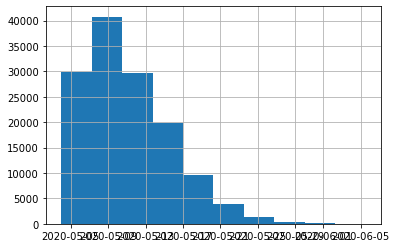

In [10]:
g_a['event_datetime'].hist(); #Hist for time period

The more effective time with the most of users was in first two weeks. some still playing at first level for one month

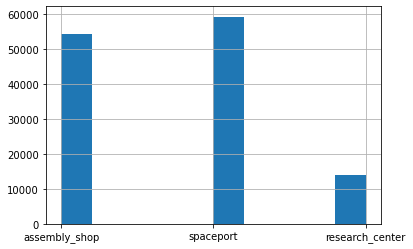

In [11]:
# Checking for building types
g_a['building_type'].hist();

<AxesSubplot:>

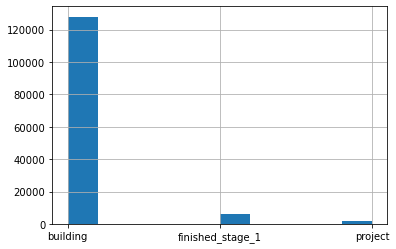

In [12]:
g_a['event'].hist()

The data is distributed fairly evenly and normally. I don’t see any obvious outliers.

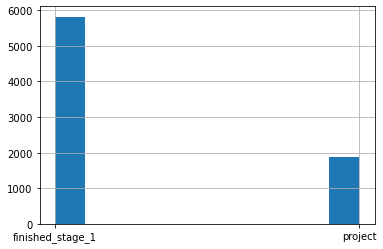

In [13]:
g_a[g_a['event'] != 'building']['event'].hist(); #Let's take a closer look at the distribution of the final stage.

These are all who have completed the first level, and it is noticeable that about a third completes the project.

Let's look at the existing project, suddenly there is something incomprehensible.

In [14]:
g_a[g_a['project_type'] == 'satellite_orbital_assembly'].head() 

,event_datetime,event,building_type,user_id,project_type
47121,2020-05-08 18:10:25,project,NaN,e3c66498-9d45-4000-9392-f81e6796e7da,satellite_orbital_assembly
57398,2020-05-09 13:49:11,project,NaN,936e7af6-8338-4703-a1df-fc6c3f5b8e34,satellite_orbital_assembly
58797,2020-05-09 16:19:33,project,NaN,a4491c86-c498-4f74-a56e-65c136d0e9a1,satellite_orbital_assembly
61174,2020-05-09 20:29:01,project,NaN,85d9e675-562b-4329-8bbd-14d3b39096be,satellite_orbital_assembly
63770,2020-05-10 00:57:47,project,NaN,1889ca71-3c57-4e61-9ea6-a711971bbf0a,satellite_orbital_assembly


Let's see what the player's path looks like.

In [15]:
g_a[g_a['user_id'] == 'e3c66498-9d45-4000-9392-f81e6796e7da']

,event_datetime,event,building_type,user_id,project_type
2196,2020-05-04 06:50:30,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN
3936,2020-05-04 11:58:16,building,spaceport,e3c66498-9d45-4000-9392-f81e6796e7da,NaN
20206,2020-05-06 07:22:08,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN
20261,2020-05-06 07:31:59,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN
27376,2020-05-07 00:34:18,building,spaceport,e3c66498-9d45-4000-9392-f81e6796e7da,NaN
31983,2020-05-07 10:52:16,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN
32956,2020-05-07 12:58:20,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN
33910,2020-05-07 14:58:20,building,assembly_shop,e3c66498-9d45-4000-9392-f81e6796e7da,NaN
35308,2020-05-07 18:12:58,building,research_center,e3c66498-9d45-4000-9392-f81e6796e7da,NaN
40433,2020-05-08 05:00:46,building,spaceport,e3c66498-9d45-4000-9392-f81e6796e7da,NaN


It's interesting that you can build an assembly shop several times and he loves it more than other types of buildings. In global terms, this is nothing, but the mechanics of the game are clearer. 
Only one question torments me, why did he complete the project, and could already move to a new level, but instead he took up construction and did not move for almost two more days. *Maybe this is not so obvious,* it will be possible to investigate next time.

#### Table study Ad Cost

In [16]:
first_check(ad_c)

'Table cap:'

,source,day,cost
0,facebook_ads,2020-05-03,935.882786
1,facebook_ads,2020-05-04,548.354480
2,facebook_ads,2020-05-05,260.185754
3,facebook_ads,2020-05-06,177.982200
4,facebook_ads,2020-05-07,111.766796


'__________________________________________________ '

' '

'Table info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   source  28 non-null     object 
 1   day     28 non-null     object 
 2   cost    28 non-null     float64
dtypes: float64(1), object(2)
memory usage: 800.0+ bytes


None

'__________________________________________________ '

' '

'Method Describe:'

,cost
count,28.000000
mean,271.556321
std,286.867650
min,23.314669
25%,66.747365
50%,160.056443
75%,349.034473
max,969.139394


'__________________________________________________ '

' '

'Numbers of duplicates:'

0

'__________________________________________________ '

' '

'Most popular values in dataframe by column'

source                   day         cost      
facebook_ads             2020-05-03  935.882786    1
                         2020-05-04  548.354480    1
youtube_channel_reklama  2020-05-08  40.217907     1
                         2020-05-07  55.740645     1
                         2020-05-06  88.506074     1
                         2020-05-05  147.041741    1
                         2020-05-04  259.073224    1
                         2020-05-03  454.224943    1
yandex_direct            2020-05-09  42.779505     1
                         2020-05-08  62.961630     1
                         2020-05-07  114.429338    1
                         2020-05-06  180.917099    1
                         2020-05-05  308.232990    1
                         2020-05-04  554.651494    1
                         2020-05-03  969.139394    1
instagram_new_adverts    2020-05-09  46.775400     1
                         2020-05-08  71.578739     1
                         2020-05-07  109.915254    

Okay, so the average and the median are different, so the cost is pretty scattered, with the shoulder to the right.

In [17]:
ad_c['day']= pd.to_datetime(ad_c['day'])

In [18]:
print('Start date',ad_c['day'].min())
print('End_date', ad_c['day'].max())

print('Total_period', ad_c['day'].max() - ad_c['day'].min())

Start date 2020-05-03 00:00:00
End_date 2020-05-09 00:00:00
Total_period 6 days 00:00:00


The start date of the advertising campaign is one day before the first day of attraction. In agreement with the marketing department, we deduce that the players start a day later than the payment for the advertising campaign.

#### Table study User Source

In [19]:
first_check(u_s)

'Table cap:'

,user_id,source
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,facebook_ads
1,00151b4f-ba38-44a8-a650-d7cf130a0105,yandex_direct
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,youtube_channel_reklama
3,001d39dc-366c-4021-9604-6a3b9ff01e25,instagram_new_adverts
4,002f508f-67b6-479f-814b-b05f00d4e995,facebook_ads


'__________________________________________________ '

' '

'Table info:'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13576 entries, 0 to 13575
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  13576 non-null  object
 1   source   13576 non-null  object
dtypes: object(2)
memory usage: 212.2+ KB


None

'__________________________________________________ '

' '

'Method Describe:'

,user_id,source
count,13576,13576
unique,13576,4
top,0001f83c-c6ac-4621-b7f0-8a28b283ac30,yandex_direct
freq,1,4817


'__________________________________________________ '

' '

'Numbers of duplicates:'

0

'__________________________________________________ '

' '

'Most popular values in dataframe by column'

user_id                               source                 
0001f83c-c6ac-4621-b7f0-8a28b283ac30  facebook_ads               1
a9ff93bd-0b96-4e89-bef7-c29326643faf  youtube_channel_reklama    1
aa08dc9a-f199-483d-aa43-2781abb889fc  instagram_new_adverts      1
aa0d0a62-0ba5-4d87-9467-4eb39d6b2d17  facebook_ads               1
aa122ae2-5e98-4d93-96dc-fdcf7016398e  facebook_ads               1
                                                                ..
53c5f5cc-975b-4be6-9a60-2a8fe0fc226f  instagram_new_adverts      1
53d146cf-1b2a-4038-8326-7900b021f418  yandex_direct              1
53d59f09-9745-4bdd-b6e5-56f98a5228d4  instagram_new_adverts      1
53d8dfd2-d601-461b-a4fd-890be5b45d27  yandex_direct              1
ffff69cc-fec1-4fd3-9f98-93be1112a6b8  facebook_ads               1
Length: 13576, dtype: int64

13576 users matches the available data. 4 sources, excellent. There are no duplicates. and implicit duplicates too

In [20]:
# Let's check if anyone got into two sources. just in case.
u_s.groupby('user_id')['source'].agg('nunique').sort_values(ascending=False).head()

user_id
0001f83c-c6ac-4621-b7f0-8a28b283ac30    1
a9ff93bd-0b96-4e89-bef7-c29326643faf    1
aa08dc9a-f199-483d-aa43-2781abb889fc    1
aa0d0a62-0ba5-4d87-9467-4eb39d6b2d17    1
aa122ae2-5e98-4d93-96dc-fdcf7016398e    1
Name: source, dtype: int64

Nobody got. Fine.

### Findings on available data

We can say that the data is homogeneous, understandable. There are no overlaps

## Exploratory data analysis (EDA)


### Preparing the player profile table

In [21]:
g_a = g_a.drop_duplicates() #Get rid of the only duplicate

In [22]:
profiles = ( #Let's collect the profile of each player, who plays how
        g_a.sort_values(by=['user_id', 'event_datetime'])
        .groupby('user_id')
        .agg(
            {
                'event_datetime': 'first',
                'project_type': 'nunique',
                'event': 'nunique',
                'building_type': 'count'#,
                #'building_type': 'nunique'
            }
        )
        .rename(columns={'event_datetime': 'start_level',
                         'project_type': 'fin_project',
                         'event': 'event_n',
                         'building_type': 'build'
        
        })
        .reset_index()
    )


In [23]:
profiles

,user_id,start_level,fin_project,event_n,build
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,0,1,13
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,0,1,9
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,0,1,4
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,0,2,8
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,0,1,12
...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,0,2,9
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,0,1,16
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,0,2,9
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,0,1,7


In [24]:
profiles_other = ( # Add profiles with other data
        g_a.sort_values(by=['user_id', 'event_datetime'])
        .groupby('user_id')
        .agg(
            {
                'event_datetime': 'last',
                'building_type': 'nunique'
            }
        )
        .rename(columns={'event_datetime': 'last_action',
                         'building_type': 'build_types'
        
        })
        .reset_index()
    )
profiles_other

,user_id,last_action,build_types
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-20 11:26:06,3
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-18 10:46:52,2
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-14 09:21:27,2
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,2
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-22 02:46:45,3
...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11 22:15:54,3
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-14 10:11:36,3
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-12 13:01:52,3
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-11 22:04:30,2


In [25]:
profiles=profiles.merge(profiles_other, on= 'user_id', how='left') #put together

In [26]:
finishers = g_a[g_a['event'] == 'finished_stage_1'] #Build a finisher profile
finishers = (
    finishers.groupby('user_id')
        .agg(
            {
                'event_datetime': 'first',
                'event': 'nunique'
            }
        )
        .rename(columns={'event_datetime': 'finish_date',
                         'event': 'finished'
        }
        )
        .reset_index()
    )

In [27]:
finishers

,user_id,finish_date,finished
0,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-12 07:40:47,1
1,003ee7e8-6356-4286-a715-62f22a18d2a1,2020-05-17 21:47:49,1
2,004074f8-251a-4776-922c-8348dca1a2f6,2020-05-16 19:57:40,1
3,00464e5e-28ed-4be6-bf44-517ef7b3937b,2020-05-15 16:02:01,1
4,0056c007-c082-43cc-bdef-afc49bca4cb9,2020-05-16 13:48:39,1
...,...,...,...
5812,ffd002f3-3545-423e-8dba-0c6a2d48a3aa,2020-05-19 04:03:24,1
5813,ffe810f4-1a1f-464b-924d-6f120b0cb8df,2020-05-18 02:03:36,1
5814,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-11 22:15:54,1
5815,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-12 13:01:52,1


In [28]:
profiles=profiles.merge(finishers, on= 'user_id', how='left') #add to existing gamers profile
profiles

,user_id,start_level,fin_project,event_n,build,last_action,build_types,finish_date,finished
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,0,1,13,2020-05-20 11:26:06,3,NaT,NaN
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,0,1,9,2020-05-18 10:46:52,2,NaT,NaN
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,0,1,4,2020-05-14 09:21:27,2,NaT,NaN
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,0,2,8,2020-05-12 07:40:47,2,2020-05-12 07:40:47,1.0
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,0,1,12,2020-05-22 02:46:45,3,NaT,NaN
...,...,...,...,...,...,...,...,...,...
13571,ffef4fed-164c-40e1-bde1-3980f76d0fb5,2020-05-04 01:58:59,0,2,9,2020-05-11 22:15:54,3,2020-05-11 22:15:54,1.0
13572,fffab3da-da0e-4e30-ae62-10d0a2e24a4e,2020-05-04 11:58:14,0,1,16,2020-05-14 10:11:36,3,NaT,NaN
13573,fffb626c-5ab6-47c9-8113-2062a2f18494,2020-05-04 02:05:09,0,2,9,2020-05-12 13:01:52,3,2020-05-12 13:01:52,1.0
13574,ffff194a-56b7-4c12-860d-3485242ae7f5,2020-05-04 20:28:28,0,1,7,2020-05-11 22:04:30,2,NaT,NaN


In [29]:
profiles['start_dt'] = profiles['start_level'].dt.date
profiles['play_time'] = profiles['last_action']-profiles['start_level']

In [30]:
profiles=profiles.merge(u_s, on= 'user_id', how='left') 

### Calculation of the cost of attracting players

In [31]:
new_users = (
        profiles.groupby(['start_dt', 'source'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
new_users.head()

,start_dt,source,unique_users
0,2020-05-04,facebook_ads,1184
1,2020-05-04,instagram_new_adverts,1452
2,2020-05-04,yandex_direct,2078
3,2020-05-04,youtube_channel_reklama,1146
4,2020-05-05,facebook_ads,694


In [32]:
ad_c['start_dt'] = ad_c['day'] + timedelta(days= 1) #as we discussed with marketing dept, day of payment is pervious one day the user comes 
ad_c.head()

,source,day,cost,start_dt
0,facebook_ads,2020-05-03,935.882786,2020-05-04
1,facebook_ads,2020-05-04,548.354480,2020-05-05
2,facebook_ads,2020-05-05,260.185754,2020-05-06
3,facebook_ads,2020-05-06,177.982200,2020-05-07
4,facebook_ads,2020-05-07,111.766796,2020-05-08


In [33]:
new_users['start_dt']=pd.to_datetime(new_users['start_dt'])

In [34]:
    #combine advertising spending and the number of attracted users
    ad_c = ad_c.merge(new_users, on=['start_dt', 'source'], how='left')

    # divide advertising costs by the number of attracted users
    ad_c['acquisition_cost'] = ad_c['cost'] / ad_c['unique_users']
    ad_c.head()

,source,day,cost,start_dt,unique_users,acquisition_cost
0,facebook_ads,2020-05-03,935.882786,2020-05-04,1184,0.790442
1,facebook_ads,2020-05-04,548.354480,2020-05-05,694,0.790136
2,facebook_ads,2020-05-05,260.185754,2020-05-06,345,0.754162
3,facebook_ads,2020-05-06,177.982200,2020-05-07,224,0.794563
4,facebook_ads,2020-05-07,111.766796,2020-05-08,139,0.804078


### Further preparation of profiles with the received data

In [35]:
profiles['start_dt'] = pd.to_datetime(profiles['start_dt'])
profiles.finished= profiles.finished.fillna(0)
profiles['play_time']=(profiles['play_time']/ np.timedelta64(1, 'D')).astype(int)+1 #number of full days of play


In [36]:
profiles=profiles.merge(ad_c[['source','start_dt', 'acquisition_cost']], on=['start_dt', 'source'], how='left') 
#adding acquisition cost to users by date

In [37]:
profiles.head()

,user_id,start_level,fin_project,event_n,build,last_action,build_types,finish_date,finished,start_dt,play_time,source,acquisition_cost
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,2020-05-06 01:07:37,0,1,13,2020-05-20 11:26:06,3,NaT,0.0,2020-05-06,15,facebook_ads,0.754162
1,00151b4f-ba38-44a8-a650-d7cf130a0105,2020-05-06 03:09:12,0,1,9,2020-05-18 10:46:52,2,NaT,0.0,2020-05-06,13,yandex_direct,0.464206
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2020-05-05 18:08:52,0,1,4,2020-05-14 09:21:27,2,NaT,0.0,2020-05-05,9,youtube_channel_reklama,0.390759
3,001d39dc-366c-4021-9604-6a3b9ff01e25,2020-05-05 21:02:05,0,2,8,2020-05-12 07:40:47,2,2020-05-12 07:40:47,1.0,2020-05-05,7,instagram_new_adverts,0.631816
4,002f508f-67b6-479f-814b-b05f00d4e995,2020-05-05 13:49:58,0,1,12,2020-05-22 02:46:45,3,NaT,0.0,2020-05-05,17,facebook_ads,0.790136


In [38]:
g_a #quick reminder

,event_datetime,event,building_type,user_id,project_type
0,2020-05-04 00:00:01,building,assembly_shop,55e92310-cb8e-4754-b622-597e124b03de,NaN
1,2020-05-04 00:00:03,building,assembly_shop,c07b1c10-f477-44dc-81dc-ec82254b1347,NaN
2,2020-05-04 00:00:16,building,assembly_shop,6edd42cc-e753-4ff6-a947-2107cd560710,NaN
3,2020-05-04 00:00:16,building,assembly_shop,92c69003-d60a-444a-827f-8cc51bf6bf4c,NaN
4,2020-05-04 00:00:35,building,assembly_shop,cdc6bb92-0ccb-4490-9866-ef142f09139d,NaN
...,...,...,...,...,...
135635,2020-06-05 00:08:06,building,research_center,f21d179f-1c4b-437e-b9c6-ab1976907195,NaN
135636,2020-06-05 02:25:12,finished_stage_1,NaN,515c1952-99aa-4bca-a7ea-d0449eb5385a,NaN
135637,2020-06-05 08:57:52,building,research_center,ed3e7d02-8a96-4be7-9998-e9813ff9c316,NaN
135638,2020-06-05 12:12:27,finished_stage_1,NaN,32572adb-900f-4b5d-a453-1eb1e6d88d8b,NaN


In [39]:
buildings = (g_a.pivot_table(index='user_id', columns='building_type',  values='event_datetime', aggfunc='count')
             #combine and calculate buildings for users
              .rename(columns={'event_datetime': 'types_built' })
              .fillna(0)
              .reset_index())
buildings.head()

building_type,user_id,assembly_shop,research_center,spaceport
0,0001f83c-c6ac-4621-b7f0-8a28b283ac30,6.0,1.0,6.0
1,00151b4f-ba38-44a8-a650-d7cf130a0105,4.0,0.0,5.0
2,001aaea6-3d14-43f1-8ca8-7f48820f17aa,2.0,0.0,2.0
3,001d39dc-366c-4021-9604-6a3b9ff01e25,4.0,0.0,4.0
4,002f508f-67b6-479f-814b-b05f00d4e995,3.0,1.0,8.0


In [40]:
profiles=profiles.merge(buildings, on='user_id', how='left')

In [41]:
#Putting float into int
profiles.finished=profiles.finished.astype(int)
profiles.assembly_shop=profiles.assembly_shop.astype(int)
profiles.research_center=profiles.research_center.astype(int)
profiles.spaceport=profiles.spaceport.astype(int)

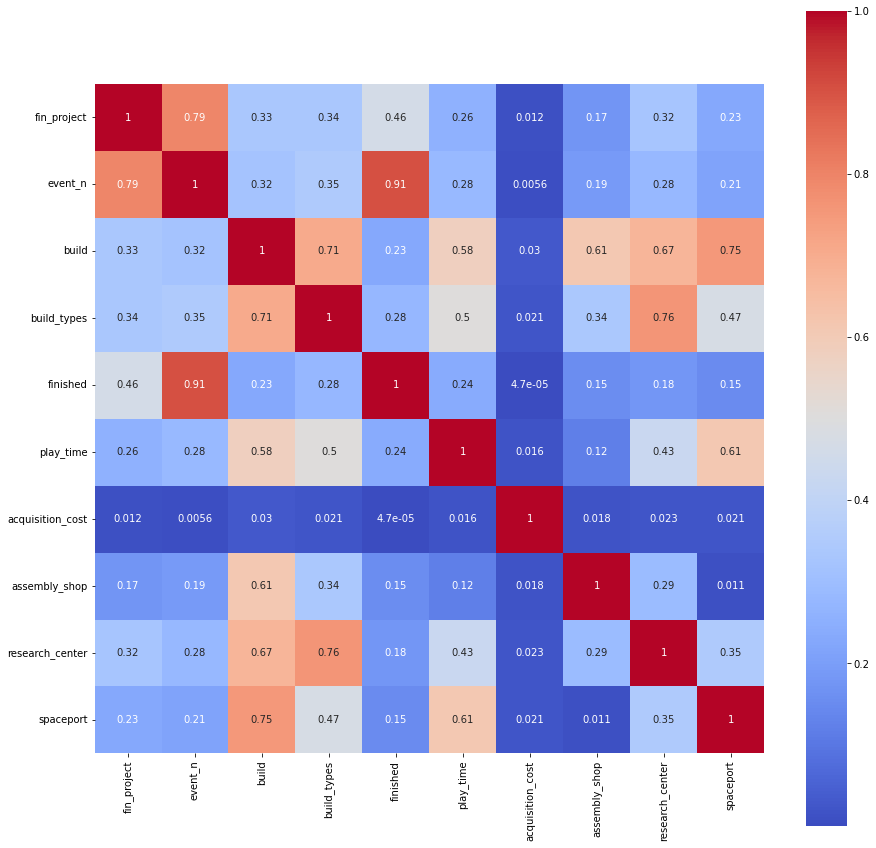

In [42]:
corr_m = profiles.corr() #Matrix of correlation between everything

plt.figure(figsize = (15,15))
sns.heatmap(corr_m, square = True, annot = True, cmap='coolwarm')# Make a heatmap

plt.show()

The cost of attraction generally does not correlate with more than one parameter.
The number of events correlates because the third event is the construction of the space station. And the second value of the correlation is close to one, this is because the third is the finish.
The number of buildings built correlates the most with spaceports than with other buildings, which means that many of them rely on this building. to this building. Spaceports also increase overall game time and players spend more time building that type of structure.

### Conclusions on the EDA block

We have collected all data and now ready to analyze it

## Analysis of the source of transition to the game on user behavior.

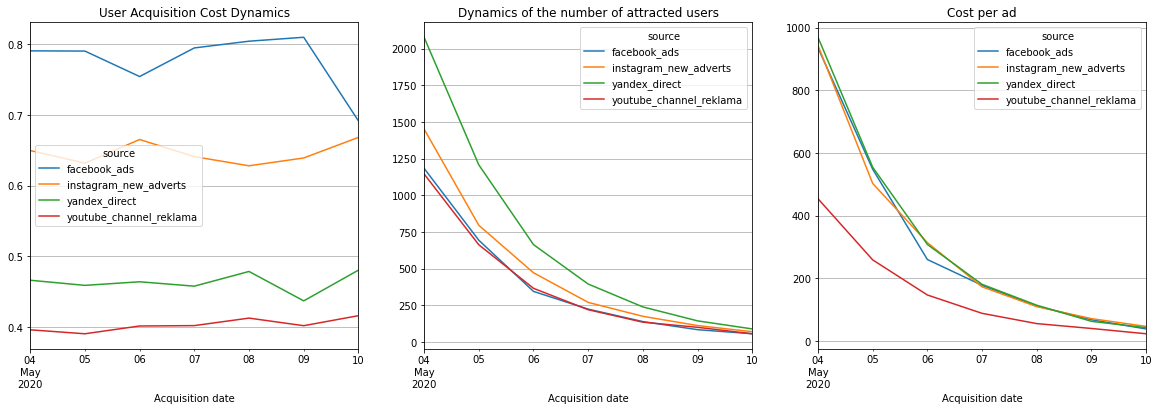

In [43]:
# set the grid for drawing graphs
plt.figure(figsize=(20, 6))

ax1 = plt.subplot(1, 3, 1)
filtered_data = ad_c.pivot_table(
        index='start_dt', columns='source', values='acquisition_cost', aggfunc='mean'
    )
filtered_data.plot(grid=True, ax=ax1)
plt.xlabel('Acquisition date')
plt.title('User Acquisition Cost Dynamics')

ax2 = plt.subplot(1, 3, 2)
filtered_data = ad_c.pivot_table(
        index='start_dt', columns='source', values='unique_users', aggfunc='mean'
    )
filtered_data.plot(grid=True, ax=ax2)
plt.xlabel('Acquisition date')
plt.title('Dynamics of the number of attracted users')

ax3 = plt.subplot(1, 3, 3)
filtered_data = ad_c.pivot_table(
        index='start_dt', columns='source', values='cost', aggfunc='mean'
    )
filtered_data.plot(grid=True, ax=ax3)
plt.xlabel('Acquisition date')
plt.title('Cost per ad');

It can be seen from the graph that the cost per acquisition channel per user is quite stable. And only on Facebook on the last day there was a slight decrease in the cost of a little cheaper than 70 cents. But the number of new users depends on the amount of money spent, then we will analyze which channels will be more attractive.

The average cost per user for acquisition is higher. Facebook and Instagram are expensive, while Yandex and YouTube are cheaper. And YouTube is almost half the price of Facebook.

In [44]:
ad_c.groupby('source')['acquisition_cost'].agg('mean') #to show numbers of cost per chanel

source
facebook_ads               0.776358
instagram_new_adverts      0.646144
yandex_direct              0.463491
youtube_channel_reklama    0.403225
Name: acquisition_cost, dtype: float64

Let's look at behavior.

In [45]:
profiles.groupby('source').mean()

,fin_project,event_n,build,build_types,finished,play_time,acquisition_cost,assembly_shop,research_center,spaceport
source,,,,,,,,,,
facebook_ads,0.143434,1.565297,9.585840,2.555759,0.421864,11.223404,0.785365,4.078136,1.080337,4.427366
instagram_new_adverts,0.142217,1.580221,9.505527,2.545862,0.438004,11.289812,0.645785,4.012847,1.056767,4.435913
yandex_direct,0.128711,1.552626,9.348557,2.538302,0.423915,11.121652,0.463590,4.005605,1.028026,4.314926
youtube_channel_reklama,0.141102,1.572599,9.299330,2.517870,0.431497,11.080045,0.397662,3.965376,1.006329,4.327625


The share of those who finish the first level at the highest level is Instagram, outperforming the lowest level of Facebook by 3.7%. This should probably be one of the key parameters, as it increases the user's LTV, because the longer he is in the game, the longer it will take to build and watch ads, which just compensates for our costs.
The second most important indicator is how many buildings were built during the game, and here in the top of Facebook. There are 3% more buildings built than users from YouTube. Also, YouTube users usually build fewer types of buildings.

In [46]:
#check if finishers differ from source
profiles[profiles['finished'] == 1 ].groupby('source').mean()

,fin_project,event_n,build,build_types,finished,play_time,acquisition_cost,assembly_shop,research_center,spaceport
source,,,,,,,,,,
facebook_ads,0.340000,2.340000,10.524348,2.730435,1.0,12.348696,0.786294,4.426087,1.333043,4.765217
instagram_new_adverts,0.324693,2.324693,10.489768,2.709413,1.0,12.407231,0.645799,4.345157,1.280355,4.864256
yandex_direct,0.303624,2.303624,10.353085,2.705681,1.0,12.314398,0.463710,4.365818,1.252693,4.734574
youtube_channel_reklama,0.327006,2.327006,10.495255,2.716135,1.0,12.402934,0.397002,4.347714,1.280414,4.867127


Differences in finishers are minor, the biggest difference is that Facebook users are 4% more likely to finish with a project than pvp.

In [47]:
profiles.groupby('source').median() #median to get if there is real difference

,fin_project,event_n,build,build_types,finished,play_time,acquisition_cost,assembly_shop,research_center,spaceport
source,,,,,,,,,,
facebook_ads,0.0,1.0,10.0,3.0,0.0,11.0,0.790442,4.0,1.0,4.0
instagram_new_adverts,0.0,1.0,10.0,3.0,0.0,11.0,0.649590,4.0,1.0,4.0
yandex_direct,0.0,1.0,10.0,3.0,0.0,11.0,0.464206,4.0,1.0,4.0
youtube_channel_reklama,0.0,1.0,10.0,3.0,0.0,11.0,0.396357,4.0,1.0,4.0


I looked at the median, maybe the values will differ from those available, and for example, the distribution in different groups is stronger. But we see that the parameters are similar.

In [48]:
binominal_columns= ['fin_project', 'finished'] #defining columns for plots for future

In [49]:
numeric_colums=['event_n',	'build',	'build_types',	'play_time',	'acquisition_cost',	'assembly_shop',	'research_center',	'spaceport']

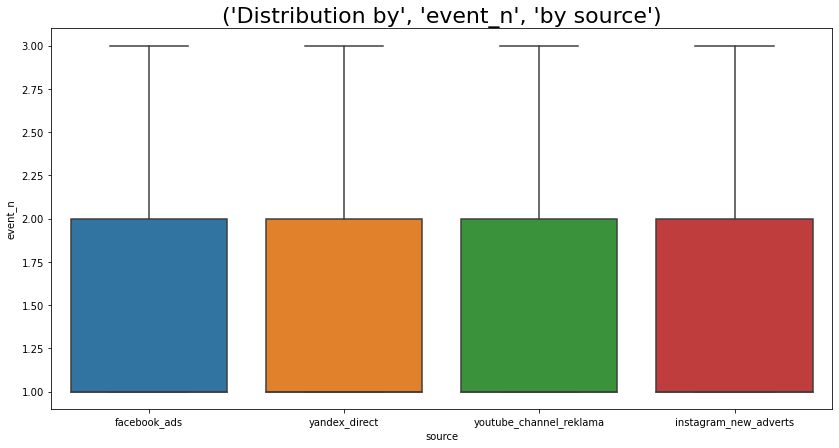

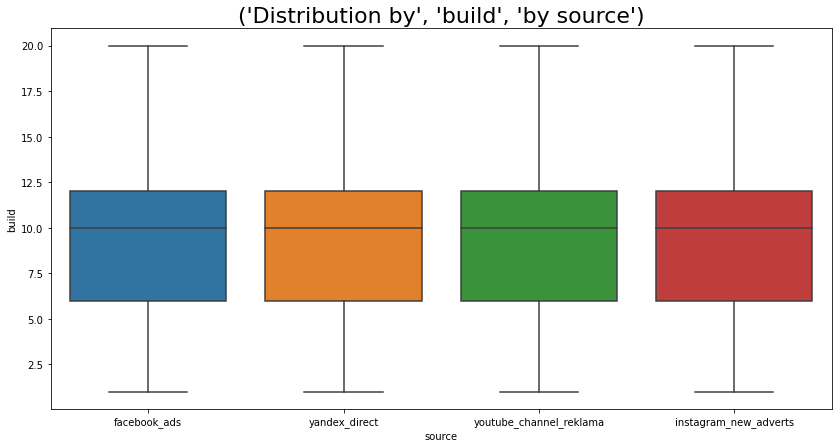

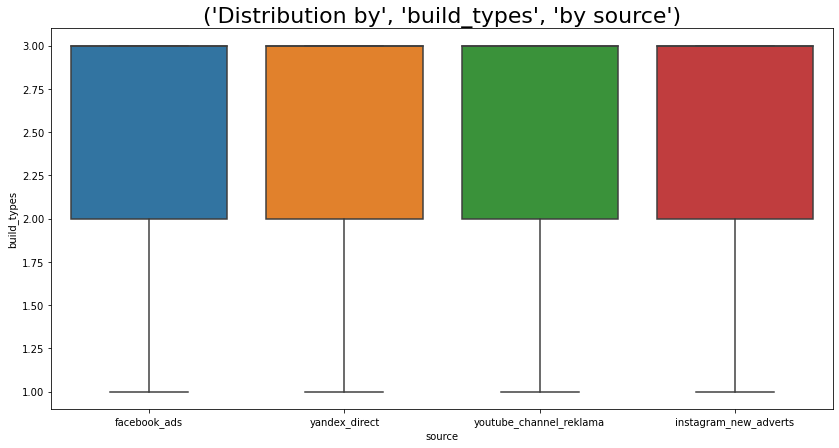

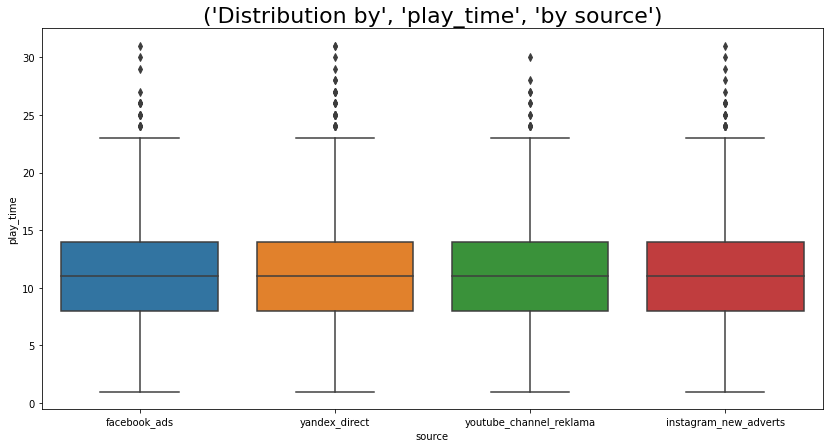

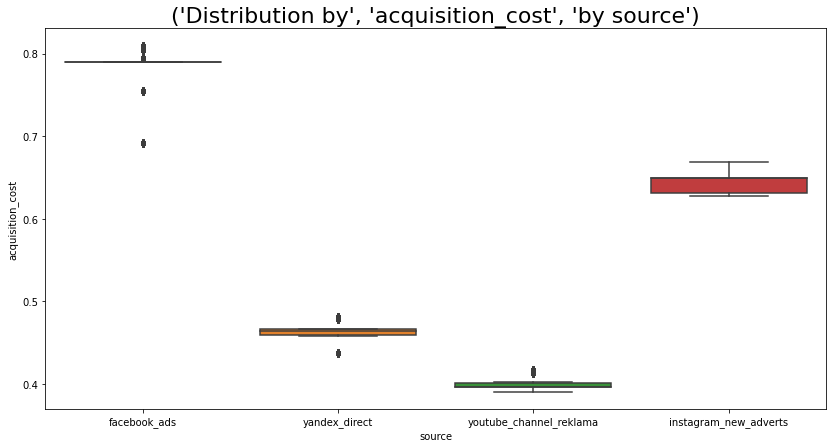

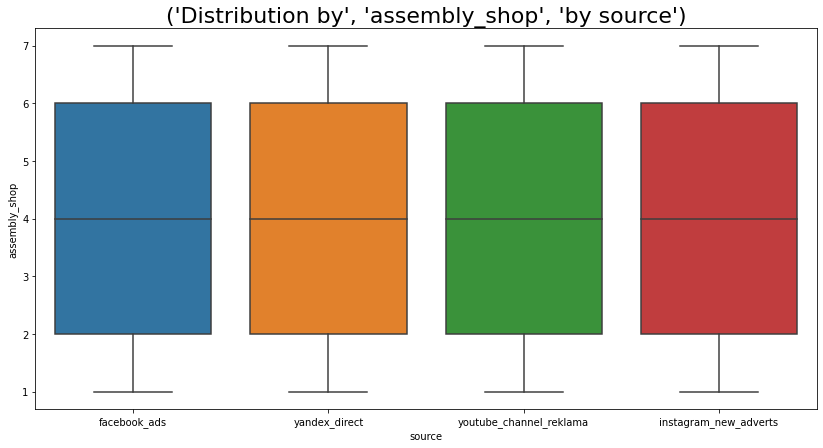

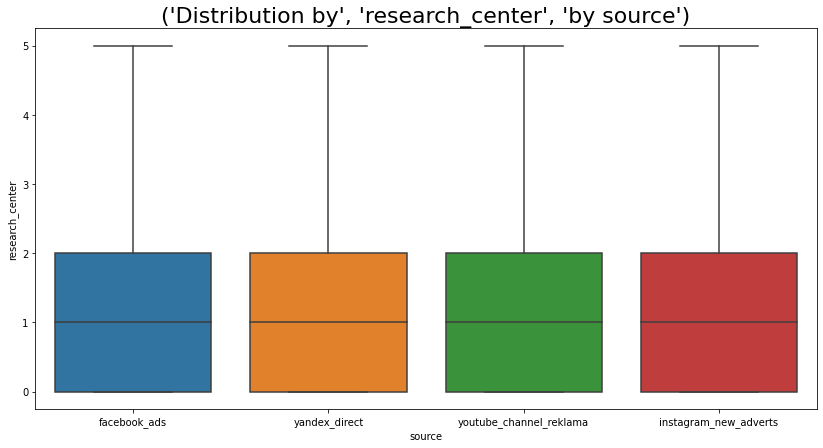

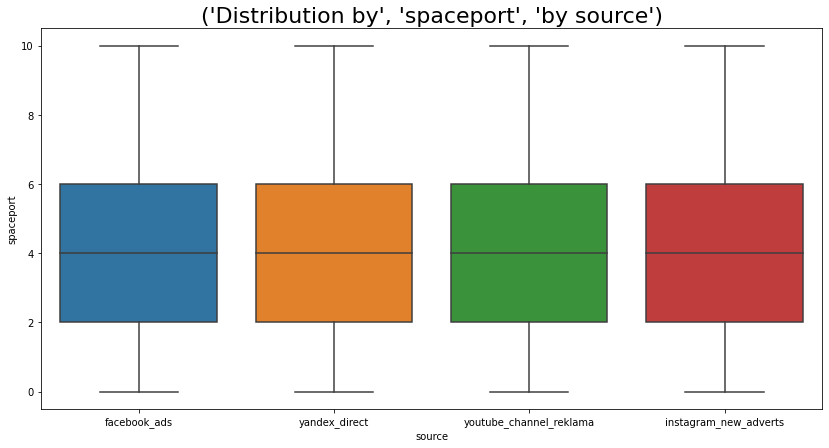

In [50]:
for i in numeric_colums: #to build different plots and see any deeper changes
  plt.figure(figsize=(14,7))
  sns.boxplot(data = profiles, y = i, x='source') #Let's look at the boxplot at each platform
  plt.title(('Distribution by',i,'by source') , fontsize=22);
  plt.show()

### Findings by source

The cost of attracting players with YouTube is twice lower than with Facebook, and we spend twice as much on Facebook. 
And more players come through Yandex, which means we can offer to reallocate budgets towards these two platforms. And since the players do not differ significantly, the expected return on investment will be higher on the two platforms Yandex and YouTube.

## Hypothesis analysis

### Function for testing hypotheses

In [51]:
finishers= profiles[profiles['finished'] == 1 ] #choosing finishers

### The time to complete the level varies depending on the way of passage: *
     - *through project implementation,*
     - *through defeating the first player in PVP battle.*

The Null Hypothesis - does not significantly differ in the speed of passing the first level for those who completed the project and those who completed the victory over the player.
Alternative Hypothesis - is that they complete the victory over the enemy much faster than the project.

In [52]:
finishers.groupby('fin_project')['play_time'].mean()

fin_project
0    11.606176
1    13.963023
Name: play_time, dtype: float64

The project ends the level two days later, and if in relative terms, then 20% longer than PVP players

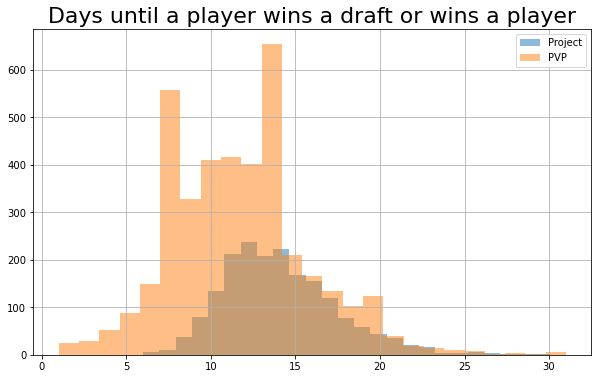

In [53]:
plt.figure(figsize=(10, 6))

finishers[finishers['fin_project']==1]['play_time'].hist(bins=25, alpha=0.5)
finishers[finishers['fin_project']==0]['play_time'].hist(bins=25, alpha=0.5)
plt.title( 'Days until a player wins a draft or wins a player' , fontsize=22);
plt.legend(['Project', 'PVP'])
plt.show()

Two peaks are noticeable on the chart of the players who defeated the opponent, one on the 7th day, and the second on the 14th, perhaps there is some peculiarity in this. 
Also, importantly, PVP players can complete the level before 6 days. And even in one day. Does the Game Designer think this is too fast?

In [54]:
alpha = .01 # set the critical level of statistical significance
#we use t-test because we have values for each user
results = st.ttest_ind(finishers.loc[finishers['fin_project']==1, 'play_time'], 
                       finishers.loc[finishers['fin_project']==0, 'play_time']) #testing the hypothesis that the means of two independent populations are equal

print('p-значение:', results.pvalue ) # displaying the resulting p-value

#compare the resulting p-value with a given level of statistical significance and hypothesis 1:
if (results.pvalue / 2 < alpha) and (finishers.loc[finishers['fin_project']==1, 'play_time'].mean() > 
                                  finishers.loc[finishers['fin_project']==0, 'play_time'].mean()):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 1.8882835392369192e-97
Rejecting the null hypothesis


Yes, with such a p-value level, it was possible to choose any alpha at all. You can definitely complete the level faster if you end the level with a battle.

### The second Research Center is more often built by those that pass by completing the project, and not by defeating the player.

The Null Hypothesis - is the construction of research centers and their number does not differ for those who end up defeating the enemy.
Alternative Hypothesis - Those who end up building a station build more research labs than those who end up defeating the enemy.

In [55]:
finishers['research_center'].max() # how many centers could maximum be

5

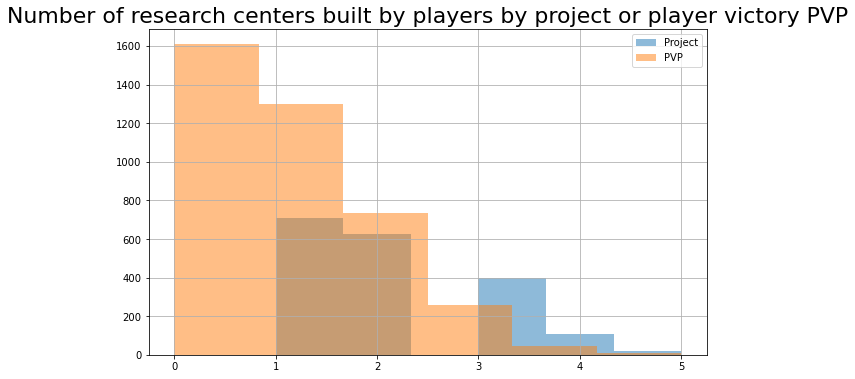

In [56]:
plt.figure(figsize=(10, 6))

finishers[finishers['fin_project']==1]['research_center'].hist(bins=6, alpha=0.5)
finishers[finishers['fin_project']==0]['research_center'].hist(bins=6, alpha=0.5)
plt.title( 'Number of research centers built by players by project or player victory PVP' , fontsize=22);
plt.legend(['Project', 'PVP'])
plt.show()

In [57]:
profiles[profiles['finished'] == 1].groupby('fin_project').agg('mean') #how do they differ from each other

,event_n,build,build_types,finished,play_time,acquisition_cost,assembly_shop,research_center,spaceport
fin_project,,,,,,,,,
0,2.0,9.411541,2.578335,1.0,11.606176,0.558120,4.125032,0.950392,4.336117
1,3.0,12.647910,3.000000,1.0,13.963023,0.564238,4.885316,1.981243,5.781350


In [58]:
alpha = .05 # set the critical level of statistical significance

results = st.ttest_ind(finishers.loc[finishers['fin_project']==1, 'research_center'], 
                       finishers.loc[finishers['fin_project']==0, 'research_center']) #testing the hypothesis that the means of two independent populations are equal

print('p-значение:', results.pvalue ) #displaying the resulting p-value

#compare the resulting p-value with a given level of statistical significance and hypothesis 1:
if (results.pvalue / 2 < alpha) and (finishers.loc[finishers['fin_project']==1, 'research_center'].mean() > 
                                  finishers.loc[finishers['fin_project']==0, 'research_center'].mean()):
    print("Rejecting the null hypothesis")
else:
    print("Failed to reject the null hypothesis")

p-значение: 1.8426235540900987e-274
Rejecting the null hypothesis


Those who work on the project build and significantly more often build research centers than those who defeat the enemy

## Players clustering

Since we noticed two peaks on the graph of the speed of passing the level, we will try to separate the players using the Data Science method, probably there are features of the game in this

In [59]:
short_profiles = profiles.drop(columns=['user_id', 'source','start_level', 'last_action','finish_date', 'start_dt']) #leaving only that numeric numbers

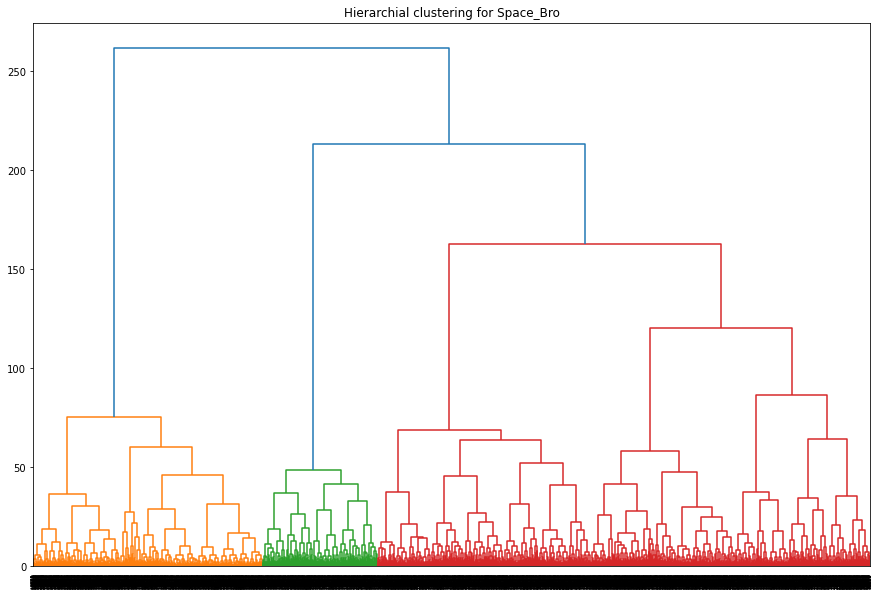

In [60]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
# mandatory data standardization before working with algorithms
sc = StandardScaler()
X_sc = sc.fit_transform(short_profiles)
linked = linkage(X_sc, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for Space_Bro')
plt.show()

It looks like three clusters from one side, but you can see three more hidden clusters in the third red cluster. There are 5 clusters in total.

In [61]:
from sklearn.tree import plot_tree
from sklearn.cluster import KMeans

# set the model k_means with the number of clusters 5 and fix the value of random_state
km =  KMeans(n_clusters=5, random_state=0)
# predict clusters for observations (the algorithm assigns them numbers from 0 to 4)
labels =  km.fit_predict(X_sc)

# save the cluster labels in the field of our dataset
profiles['cluster_km']= labels


In [62]:
profiles.groupby('cluster_km')['user_id'].agg('count') #how big is clusters

cluster_km
0    3843
1    3916
2    1866
3    2592
4    1359
Name: user_id, dtype: int64

Fairly well clustered and sizes are really close

In [63]:
profiles.groupby('cluster_km').agg('mean')

,fin_project,event_n,build,build_types,finished,play_time,acquisition_cost,assembly_shop,research_center,spaceport
cluster_km,,,,,,,,,,
0,0.0,1.0,12.109810,2.899818,0.0,12.824876,0.564620,4.698933,1.738225,5.672652
1,0.0,1.0,5.268641,1.927732,0.0,7.793412,0.555603,2.814607,0.001277,2.452758
2,1.0,3.0,12.647910,3.000000,1.0,13.963023,0.564238,4.885316,1.981243,5.781350
3,0.0,2.0,10.945988,2.903549,1.0,12.830247,0.557251,4.606481,1.448688,4.890818
4,0.0,2.0,6.484915,1.958057,1.0,9.271523,0.559778,3.206770,0.000000,3.278146


Based on the above analysis with three clusters, it was not possible to definitively identify those who finished the game by defeating the opponent.

*Cluster 0 - "Almost finished": These players seem to have almost completed everything and their characteristics are similar to those who finished the project. They have built a lot and spent a considerable amount of time in the game. It's possible that they lack something to finish and either quit or not, which is hard to determine at the moment. These users can be referred to the marketing department for further consideration.*  
*Cluster 1 - "Dropouts": These are the players who dropped out of the game, and the first week is the time when a person retains interest in the game. They build very little, and hardly anyone builds a research center. They quickly built something and got disappointed.*  
*Cluster 2 - "Scientific Builders": These are the players who finish the project, and they build almost twice as many research stations as others.*  
*Cluster 3 - "Victorious Warriors": These are the players who finish the game by defeating the opponent, and they spend slightly less time in the game compared to the builders.*  
*Cluster 4 - "Manchkins": Their main focus is to quickly attack the opponent, and they don't need research centers. They finish the game in 9 days and sometimes don't even build two types of structures.* 


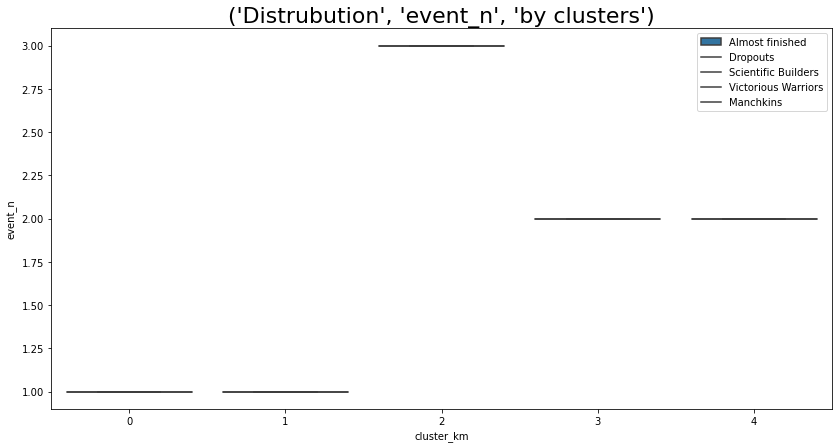

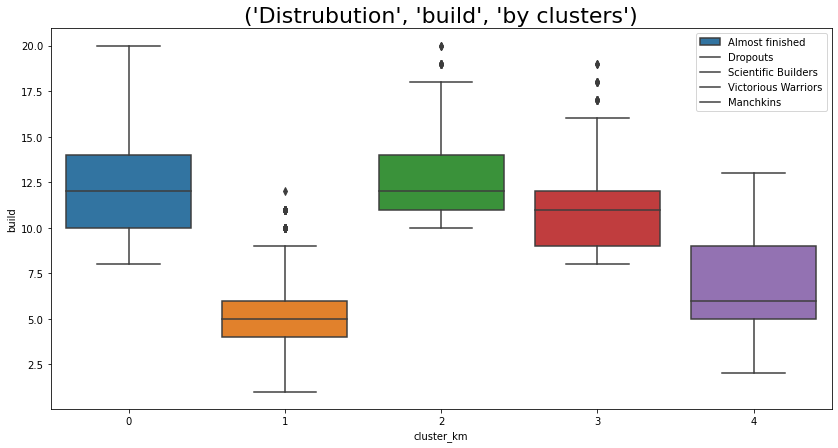

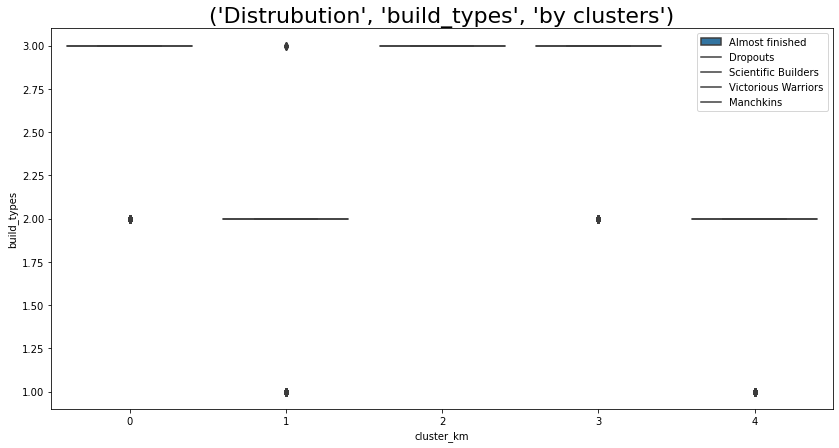

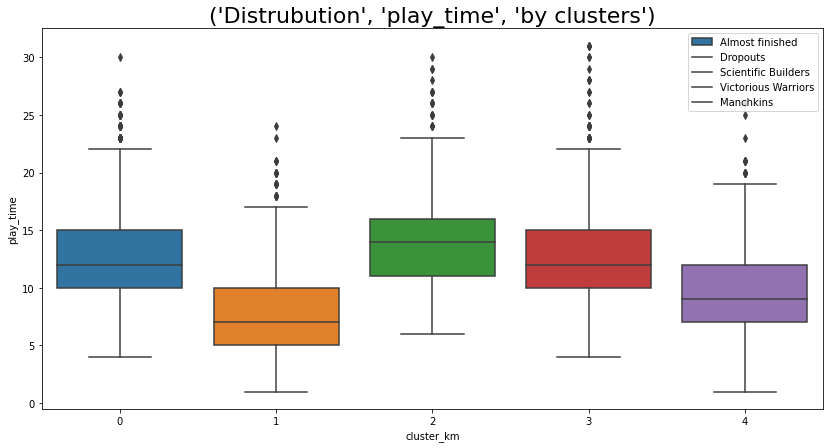

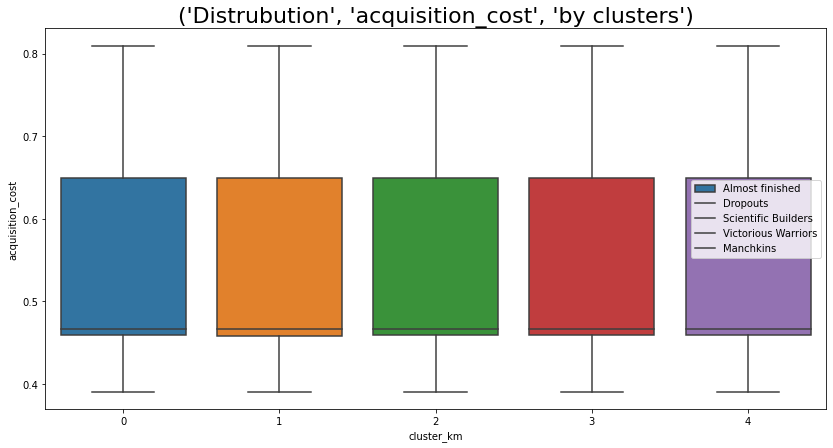

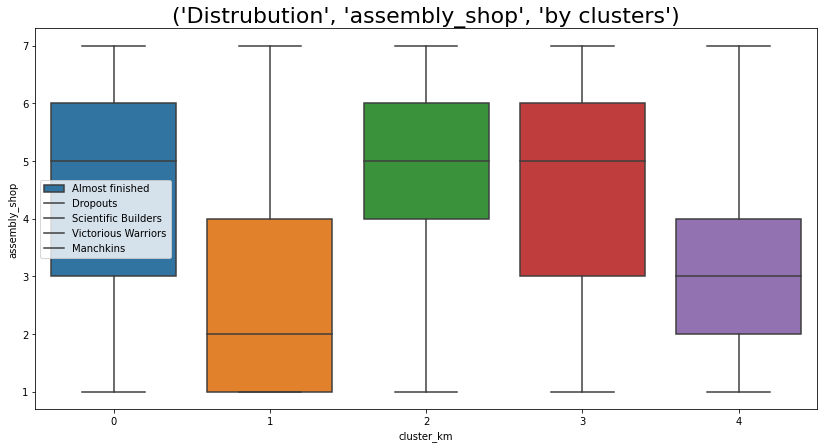

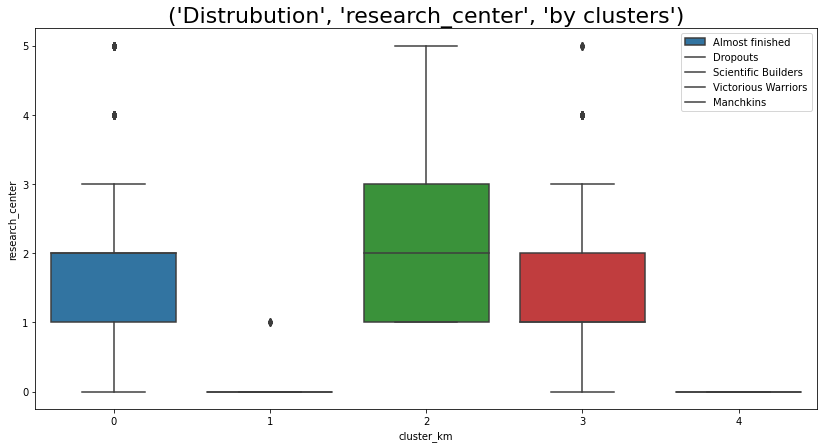

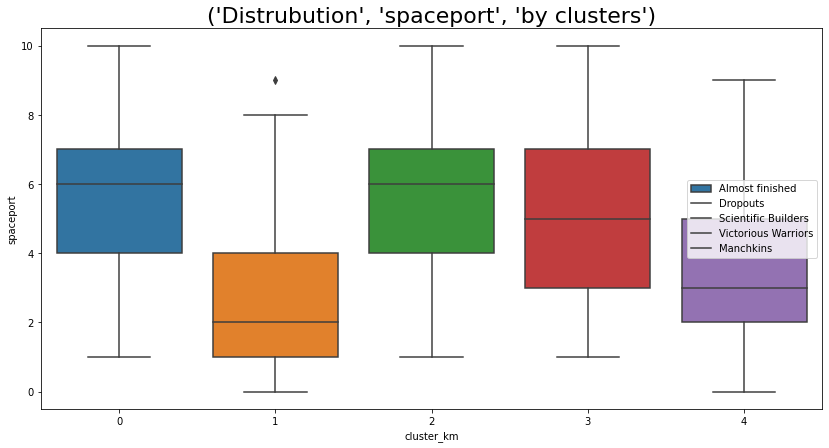

In [64]:
for i in numeric_colums:
  plt.figure(figsize=(14,7))
  sns.boxplot(data = profiles, y = i, x='cluster_km') #Look at boxplot for each platform
  plt.title(('Distrubution',i,'by clusters') , fontsize=22)
  plt.legend(['Almost finished','Dropouts', 'Scientific Builders', 'Victorious Warriors', 'Manchkins'])
  plt.show();

Now you can visually look at the distribution, and see that the Vot-Voty are very similar to both the cluster of builders and the cluster of solid warriors, especially the distribution by type of building, and now you can and should spur these players to the end of the level. And given the size of the cluster, this will greatly save us on attracting new customers, and will return those who were involved, but could not pass the first level.

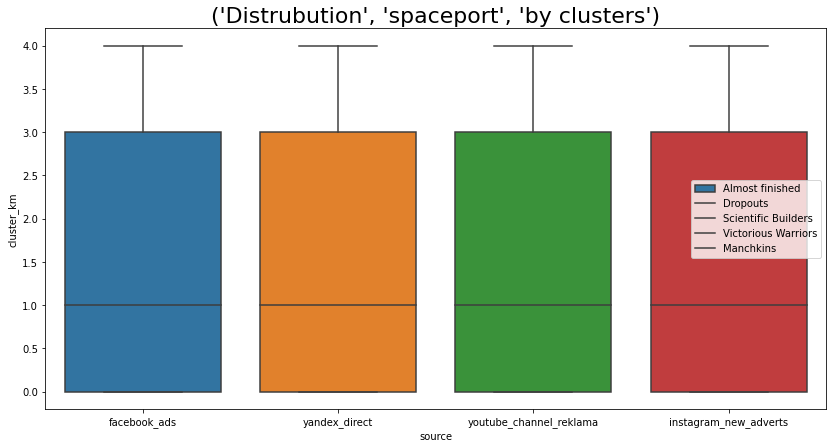

In [65]:
plt.figure(figsize=(14,7))
sns.boxplot(data = profiles, y = 'cluster_km', x='source') #do the clusters vary from platform they come from
plt.title(('Distrubution',i,'by clusters') , fontsize=22)
plt.legend(['Almost finished','Dropouts', 'Scientific Builders', 'Victorious Warriors', 'Manchkins'])
plt.show();

No any visual difference

In [66]:
source = ['facebook_ads', 'instagram_new_adverts', 'yandex_direct', 'youtube_channel_reklama']

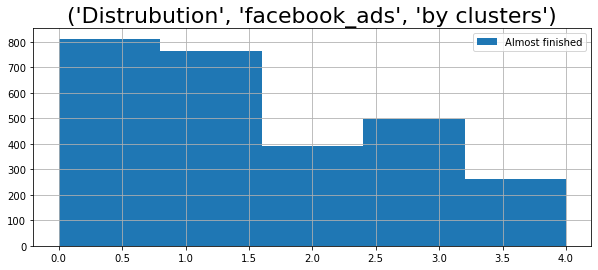

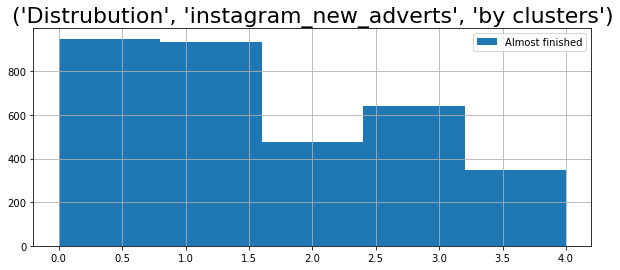

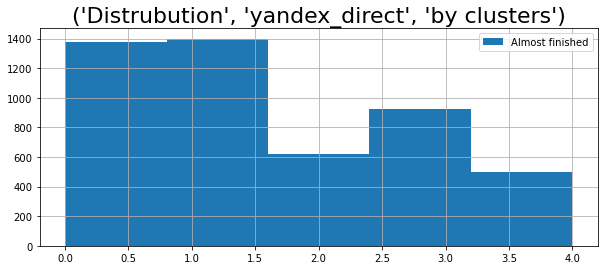

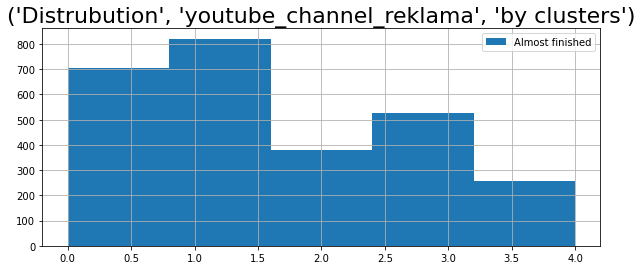

In [67]:
for i in source:
    plt.figure(figsize=(10,4))
    profiles[profiles['source'] == i]['cluster_km'].hist(bins =5) #dive deeper to get maybe difference would be open in hyst 
    plt.title(('Distrubution',i,'by clusters') , fontsize=22)
    plt.legend(['Almost finished','Dropouts', 'Scientific Builders', 'Victorious Warriors', 'Manchkins'])
    plt.show();

All diagrams are similar, and I don't see significant changes. Thus, we can say that there is no dependence on the style of the game and the source from which the players got.

In [68]:
source_cluster = profiles.pivot_table(values='user_id', index='source',  columns='cluster_km', aggfunc='count').T
source_cluster

source,facebook_ads,instagram_new_adverts,yandex_direct,youtube_channel_reklama
cluster_km,,,,
0,812,949,1376,706
1,764,932,1399,821
2,391,476,620,379
3,499,642,926,525
4,260,348,496,255


In [69]:
source_cluster /= source_cluster.sum() #lets find share of 

In [70]:
pd.set_option('display.float_format',lambda x: '%.2f' % x)

In [71]:
source_cluster.T.rename(columns = {0:'Almost finished', 1:'Dropouts', 2:'Scientific Builders', 3:'Victorious Warriors', 4:'Manchkins'})*100

cluster_km,Almost finished,Dropouts,Scientific Builders,Victorious Warriors,Manchkins
source,,,,,
facebook_ads,29.79,28.03,14.34,18.31,9.54
instagram_new_adverts,28.35,27.85,14.22,19.18,10.40
yandex_direct,28.57,29.04,12.87,19.22,10.30
youtube_channel_reklama,26.28,30.57,14.11,19.55,9.49


This is how it looks more clearly than on the graphs. We see the ratio of each category separately. That Facebook delivers less "Almost finished" and "Dropouts". But significantly more Munchkins.
YouTube delivers the least munchkins, and the leader in the number of "Dropouts" and "Almost finished". To summarize, it is almost 3% more than Instagram. But while YouTube is several times cheaper, this is not so significant.
It cannot be said that any channel is significantly distinguished by something.

### Monetization

The idea was to generate revenue by showing advertisements in the mobile game.

Based on the available open source data, the CPM (Cost Per Mille) for Europe is $9 and for the USA it is $28, which means advertisers pay that amount for every 1000 impressions of their ads.

We know that the median for our users is 10 buildings completed in 11 days, and the acquisition cost ranges from $0,396 to $0.79 with an average of $0,56.

For the average customer in the **United States**, if we show ads 20 times *by displaying them at the beginning and end of the construction of each building, and every day for one ads, we could potentially make a* **profit** even from users who come from Facebook. The estimated **margin per customer from the USA would be $0,868**.

However, for customers in **Europe**, using the same recommendation for ad views would result in a maximum margin of only $0,279, which is not enough even for a YouTube channel. Only if the number of advertisement impressions was doubled, meaning users were shown twice as many ads, would the average person be in the profitable zone. *So we should show 4 times per day and in the beggining of construction, and in the end.*

Unfortunately, I don't have additional information about the distribution of users between Europe and the USA. It may be worthwhile to obtain this information in the future in order to propose a more effective way of displaying ads.

One possible approach could be to reduce the number of users from Europe through expensive advertising campaigns on Facebook and Instagram, and instead focus more on other two.

## Conclusions

The cost of acquiring players through YouTube is half as much as through Facebook, but we are spending twice as much on Facebook. Moreover, more players are coming from Yandex, which means we can consider reallocating budgets towards these two platforms, Yandex and YouTube. Since players do not significantly differ in terms of characteristics, the expected return on investment is likely to be higher on these two platforms. Therefore, it would be wise to prioritize expenses towards Yandex and YouTube, while reducing expenses on Facebook. However, we should not eliminate Facebook entirely, as we can reevaluate spending when we start monetizing to see if players from different platforms are spending money.

Players build more spaceports than other buildings.

You can definitely complete the level faster if you end the game with a battle.

Those who work on the project build and statistically significantly more often build research centers than those who defeat the enemy

I was especially impressed with the clusters, I didn’t even think that it would be so easy to single out Munchkins and 'Victorious Warriors'. 
And it’s also very useful for our game to highlight the "Almost finished" group, this will help reduce advertising costs.

Based on the cluster analysis, it appears that:

Cluster 0, the "Almost Finished" group, seems to have completed most of the project and their characteristics are similar to those who have finished. They have built a lot and spent a considerable amount of time in the game. It's difficult to determine if they dropped out or if something is missing for them to finish. However, this group could be flagged for further consideration by the marketing department, and in the future, the parameter of "days not played" could be taken into account.  
Cluster 1, the "Dropouts," are likely players who have stopped playing, and the fact that they have built very little, with almost no research centers, suggests that they quickly built something and then lost interest.  
Cluster 2, the "Scientific Builders," are players who complete the project and build almost twice as many research centers as other clusters.  
Cluster 3, the "Dedicated Warriors," are players who win the game by defeating opponents. They spend slightly less time in the game compared to the builders.  
Cluster 4, the "Munchkins" are players who focus on quickly attacking opponents and do not prioritize research centers. They complete the game in a short period of time (9 days) and sometimes do not even build two types of buildings.  

These cluster insights can provide valuable information for marketing and game development strategies. For example, understanding the characteristics and behaviors of different player clusters can help tailor marketing campaigns and game features to better engage and retain players. Additionally, identifying potential dropouts or players who may need additional incentives to complete the game can help in developing retention strategies.

It cannot be said that any channel for attracting something significantly stands out in terms of the style of players' play. deviations are minor.

It is important to get data about the country of origin of user, so we could deep dive into understanting of monetisation of our product. The last idea is to show ad two times - at the beggining of building, and in the end. Also add advertisements show per day, If we could get it up to 4 times per day - we would be in profit.